In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def alph(r, p, A):
    
    top = np.dot(r.T, r)
    bottom = np.dot(np.dot(p.T, A), p)
    
    return top/bottom

def bet(rk, rkp1):
    
    top = np.dot(rkp1.T, rkp1)
    bottom = np.dot(rk.T, rk)
    
    return top/bottom

In [3]:
def CGM(A, b, x0, accuracy=0.00001):
    ## From https://en.wikipedia.org/wiki/Conjugate_gradient_method#The_resulting_algorithm

    """ Utilises the Conjugate Gradient Method to obtain the minimum point
    on a 2d-surface
    
    IN:  A  := numpy array, positive-definite n x n array
         b  := numpy array, scalar vector n x 1 array
         x0 := numpy array, initial guess vector n x 1 array
         accuracy := float, to what degree of accuracy should the result be
    
    OUT: xpk1 := numpy array, position of minimum of 2d surface, n x 1 array
    
    """
    
    rkp1 = b - np.dot(A, x0) # = r0
    pkp1 = rkp1
    xkp1 = x0
    
    x,y = [x0[0][0]], [x0[1][0]]

    numiter = 0

    while np.all(np.abs(rkp1) < accuracy) != True and numiter < 1000:

        numiter += 1
        alphak = alph(rkp1,pkp1,A)

        xkp1 = xkp1 + alphak * pkp1
        rk = rkp1
        rkp1 = rkp1 - alphak * np.dot(A, pkp1)

        betak = bet(rk,rkp1)

        pkp1 = rkp1 + betak * pkp1

        x.append(xkp1[0][0])
        
        y.append(xkp1[1][0])
        
    return xkp1, (x,y)

In [4]:
## Using values from
##  https://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf
## Expected outcome; xkp1 = [[2],[-2]]

A = np.array([[3,2],[2,6]])
b = np.array([[2],[-8]])

x0 = np.array([[-2],[-2]])

xkp1 = CGM(A, b, x0)

print(xkp1[0], xkp1[1])

[[ 2.]
 [-2.]] ([-2, 0.08000000000000007, 2.0], [-2, -0.6133333333333333, -2.0])


Would be nice to add a contour plot but I can't figure out how it works

In [5]:
def fx(A,b,x1i,x2i):
    x = np.array([[x1i],[x2i]])
    part_one= np. dot(np.transpose(x),np. dot(A,x))
    part_two = np. dot(np.transpose(b),x)
    z = 0.5*part_one-part_two
    return z[0][0]

In [6]:
x1 = x2 =  np.arange(-10.0, 10.0, 0.05)

In [7]:
X1, X2 = np.meshgrid(x1, x2)
Z = a = np.zeros(shape=(x1.size,x2.size))
for i in range(x1.size):
    for j in range(x2.size):
        val = fx(A,b,x1[i],x2[j])
        Z[i][j] = val

zs = Z.reshape(X1.shape)

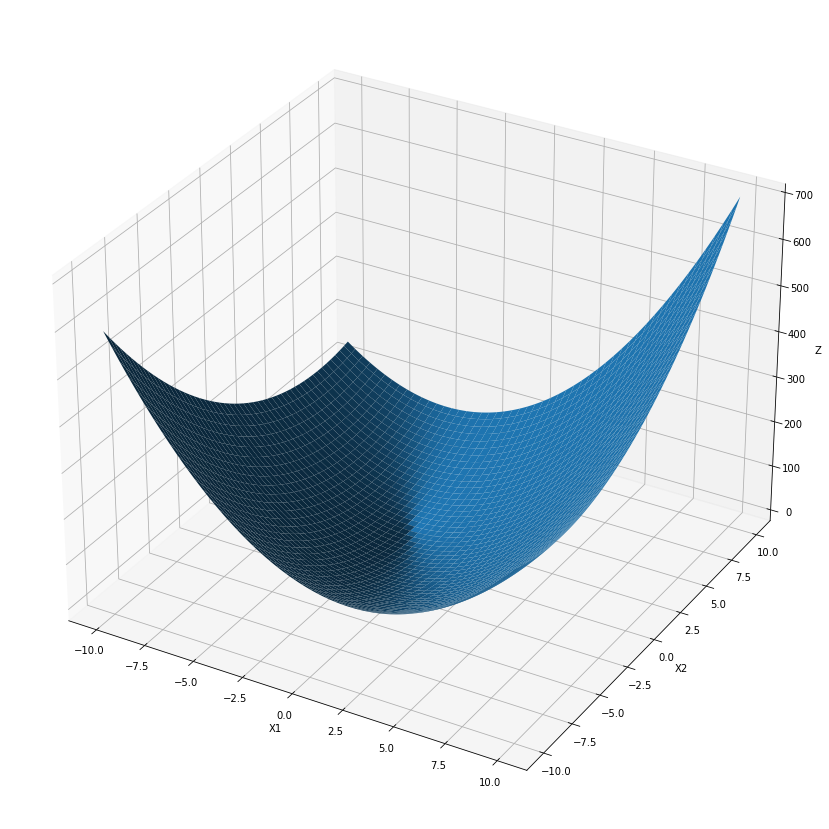

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, zs)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
plt.show()

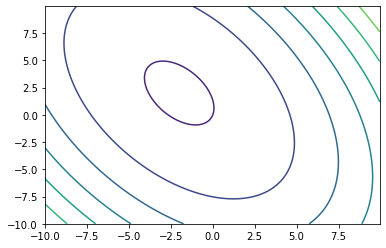

In [9]:
plt.contour(X1, X2, zs)